In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Plot Data

In [2]:
def plot_res(data_x, data_y, weights=None, is_list=False, labels=None, 
             is_data_list=False, data_labels=None, func=None):
    xval = np.arange(0.0,1.0,0.01)

    markers = ["o","v","s","D","X"]
    fig = plt.figure(figsize=(12,6),dpi=200)
    ax = plt.subplot(111)

    if data_labels is None:
        data_labels = []
        if is_data_list:
            for i in range(1,len(weights)+1):
                data_labels.append('data '+str(i))
        else:
            data_labels = ['data']

    if is_data_list:
        for i in range(len(data_x)):
            ax.plot(data_x[i],data_y[i], label=data_labels[i], lw=0, marker=markers[0], markersize=10)
    else:
        ax.plot(data_x,data_y, label=data_labels[0], lw=0, marker=markers[0], markersize=10)

    if labels is None:
        labels = []
        if is_list:
            for i in range(1,len(weights)+1):
                labels.append(str(i))
        else:
            labels = [str(1)]

    if func is None:
        if is_list:
            func = []
            for i in range(1,len(weights)+1):
                func.append(lambda x: x)
        else:
            func = lambda x: x

            
    if weights is not None:
        if is_list:
            i = 0
            for iweights in weights:
                ax.plot(xval, [iweights[1]*func[i](x)+iweights[0] for x in xval],
                        label=labels[i], lw=3)
                i += 1
        else:
            ax.plot(xval, [weights[1]*func(x)+weights[0] for x in xval],
                    label=labels[0], lw=3)

    ax.legend(loc='upper left', fancybox=True, fontsize=20)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(True)
    plt.ylim(0.9*data_y.min(),1.1*data_y.max())
    plt.xlim(0,1)

### Generating first Dataset
#### data set without "Ausreißer"
- y = 4.2 * X * pi

#### Betrachtung Datenpunkte ohne Rauschen
- Dann wäre es eine perfekte Lineare Funktion

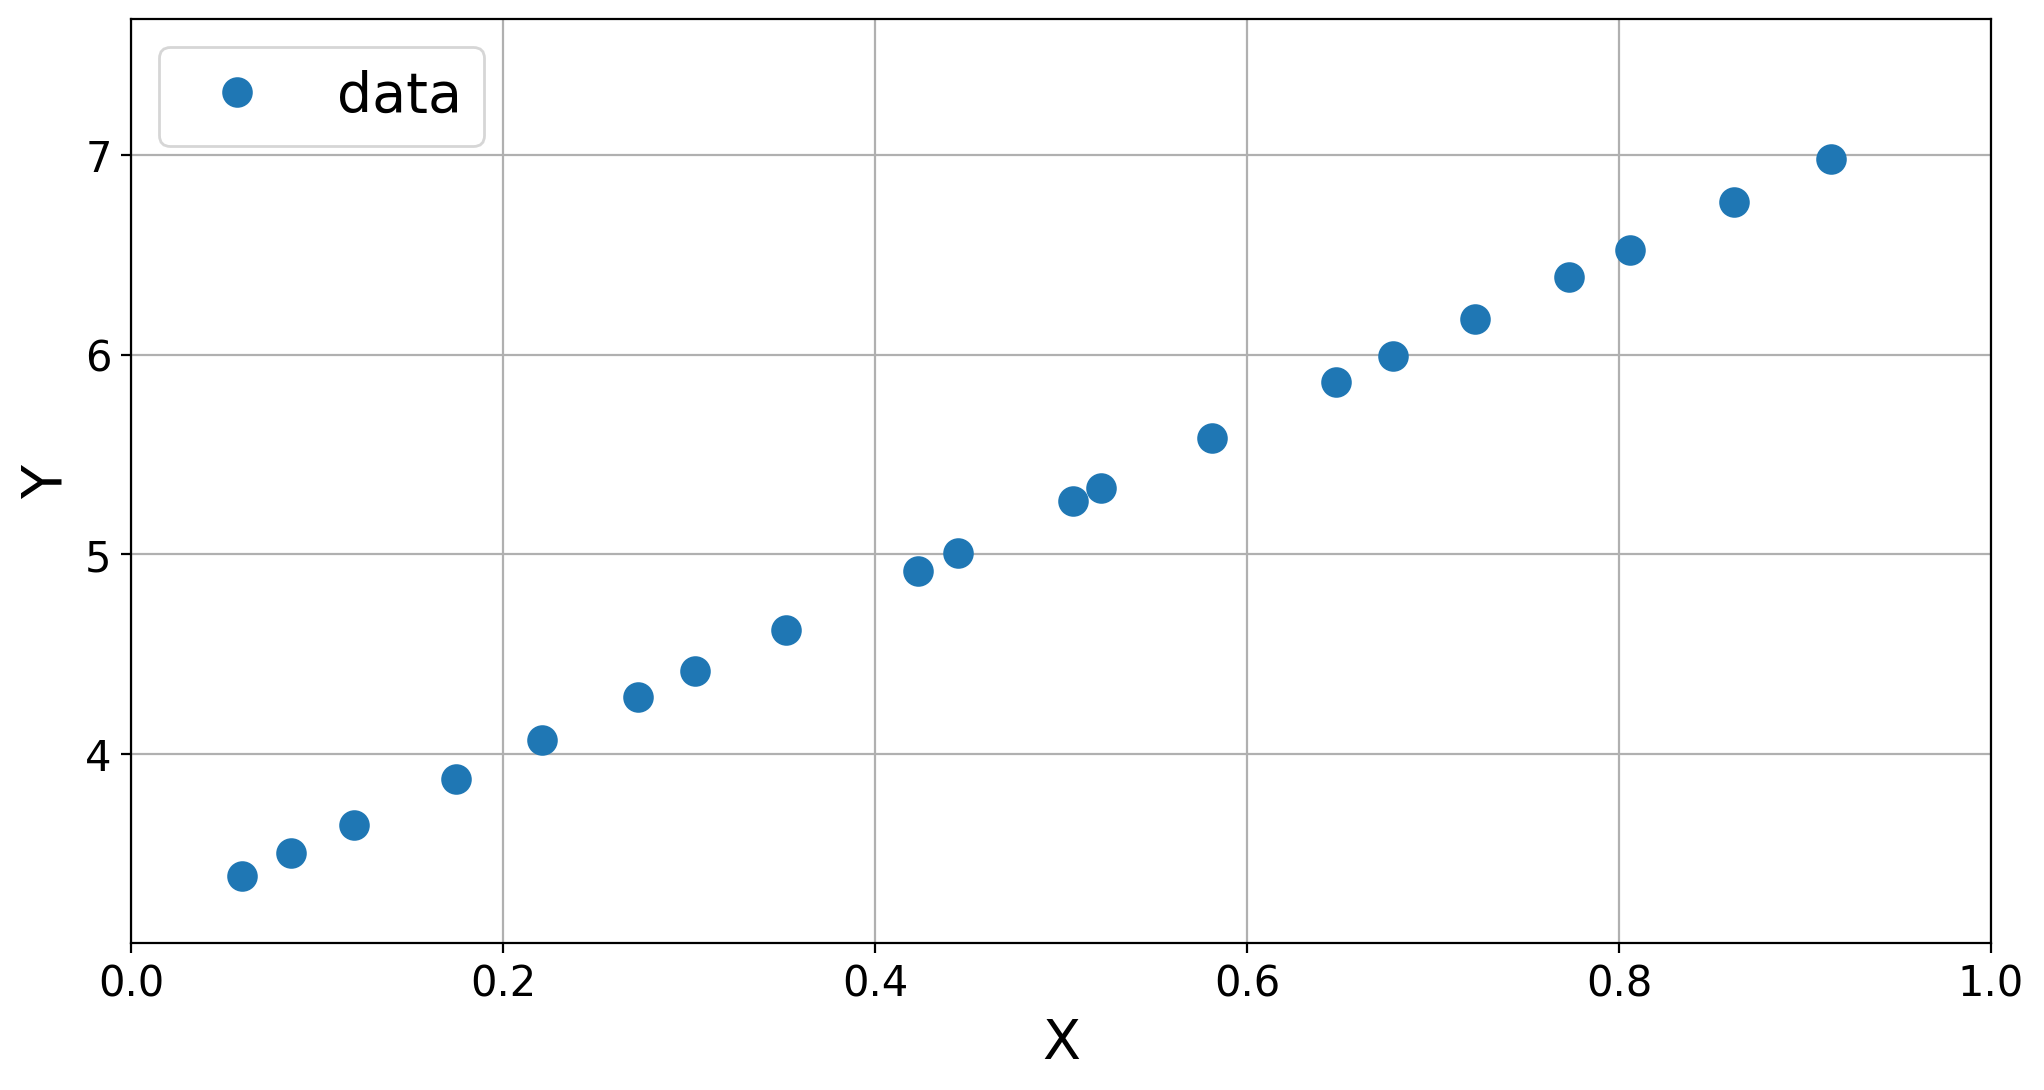

In [3]:
# Datensatz ohne Rauschen
X = np.array([0.045 * i + random.uniform(-0.02, 0.02) for i in range(1, 21)]) # 20 Einträge zwischen 0 und 1  
Y = X * 4.2 + np.pi
plot_res(data_x=X, data_y=Y)


#### Betrachtung Datenpunkte mit zufälligen Rauschen

None


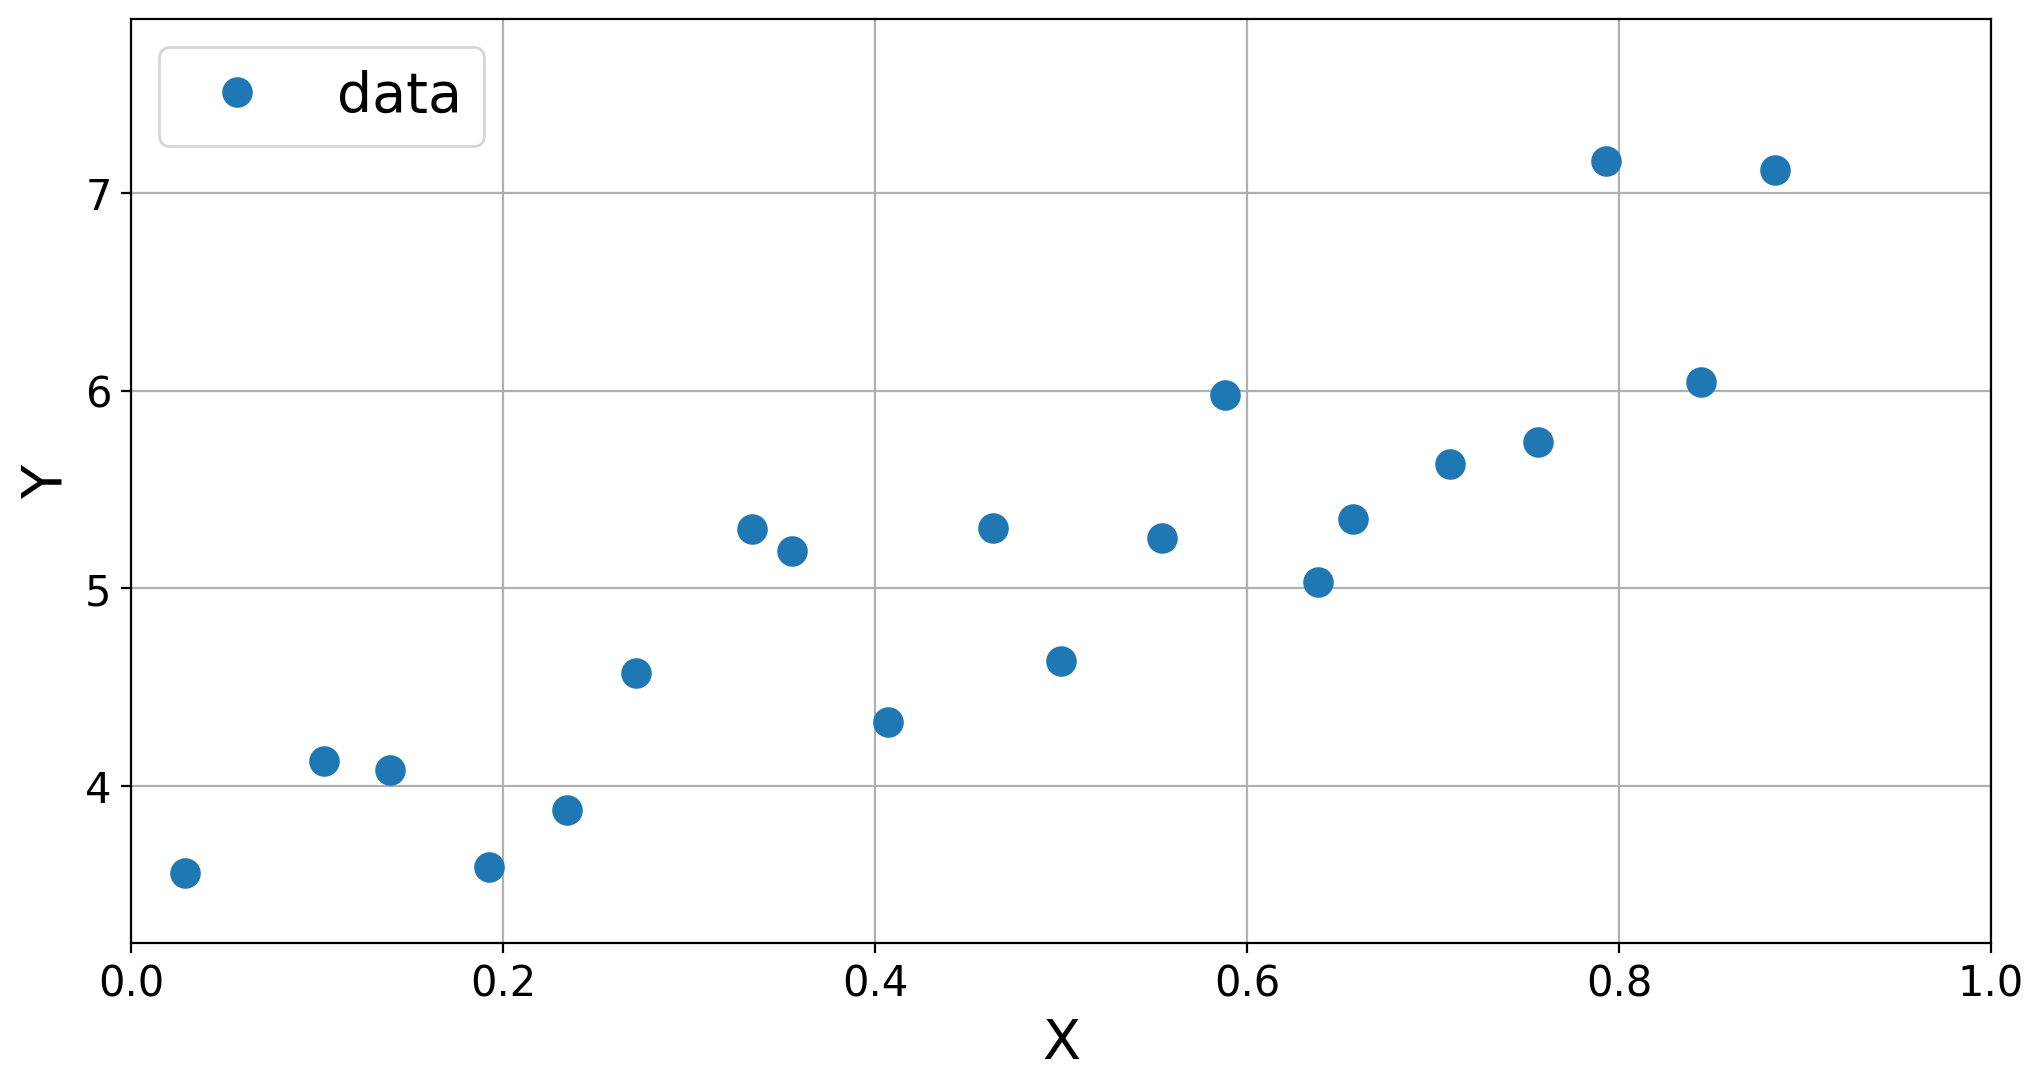

In [4]:
random.seed(42)

noise = [1]*10 + [-1]*10 # Einbau von Rauschen, damit Daten positiv/negativ beeinflusst werden
random.shuffle(noise) # Zufällige Zuordnung von Rausschen
print(random.shuffle(noise))

X1 = np.array([0.045 * i + random.uniform(-0.02, 0.02) for i in range(1, 21)]) # 20 Einträge zwischen 0 und 1 
Y1 = np.array([random.uniform(0.1, 0.8) * noise[i] for i in range(0, 20)]) # Werte zwischen 0.1 - 0.8, die jeweils positiv und negativ sind
Y1 += X1 * 4.2 # w1 = 4.2
Y1 += np.pi # y = w1 * x + wo 

plot_res(data_x=X1, data_y=Y1)

#### Betrachtung von einem Datensatz mit Rauschen UND Ausreißern
- y = 4.2 * X + pi

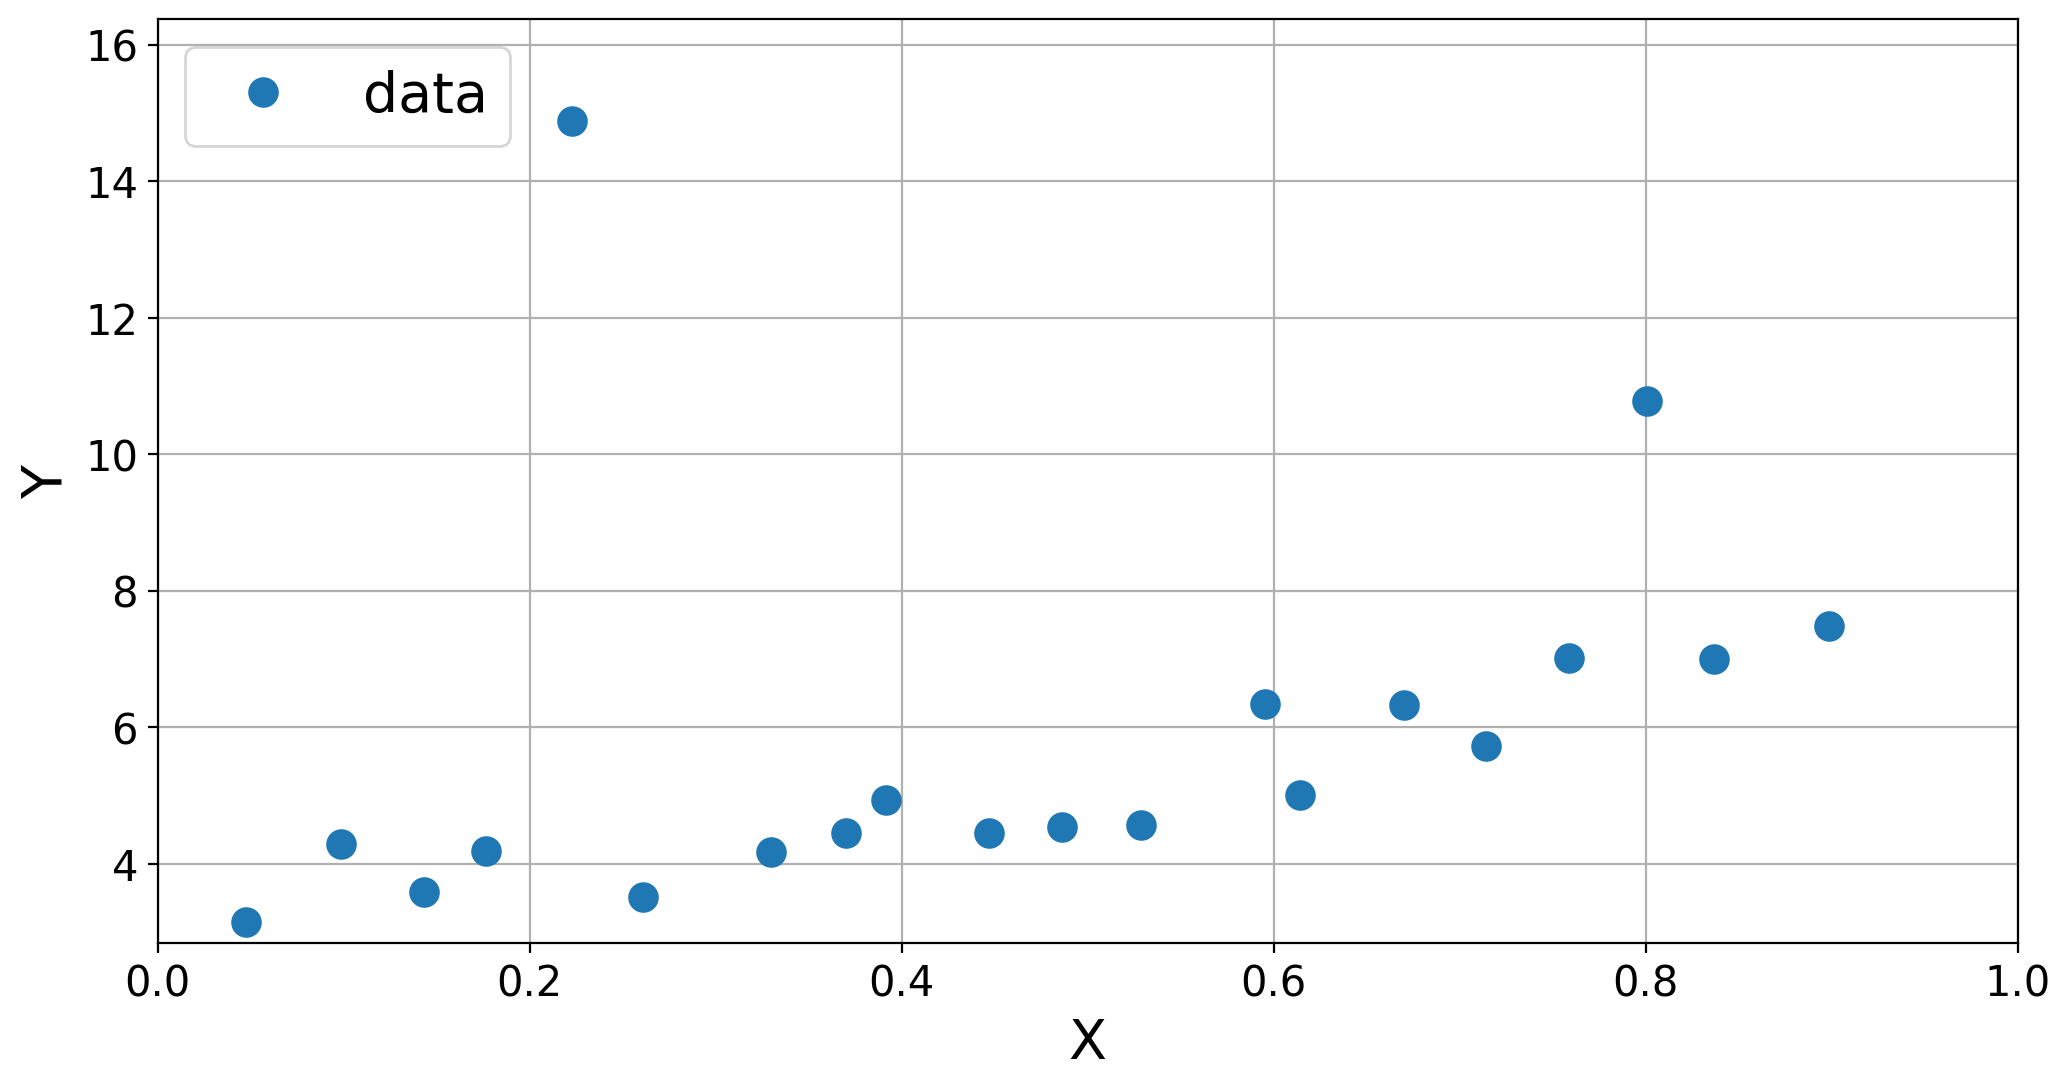

In [5]:
# Modifiy the first dataset
random.seed(42)

noise = [1]*8 + [20]*2 + [-1]*10
random.shuffle(noise)

X2 = np.array([.045*i+random.uniform(-0.02,0.02) for i in range(1,21)])
Y2 = np.array([random.uniform(.1,.8)*noise[i] for i in range(0,20)])  # noise
Y2 += X2*4.2
Y2 += np.pi

plot_res(X2,Y2)

### Gradientenverfahren, um Hyperparameter zu finden

In [6]:
# lorder = Norm von Lossfunktion
def gradient_descent(data_x, data_y, alpha, lorder=2, dabs_error_max=1E-7, 
                     iter_max=100000, verbose=0): 
    
    w0 = 0.0
    w1 = 0.0
    dabs_error = 1
    abs_error_old = 0
    iteration = 0
    
    # Suche nach besten wo, w1 bis die Änderung Loss nur noch sehr gering ist, in diesem Fall 1* 10**-7
    while dabs_error > dabs_error_max:
        error = data_y - ( w1 * data_x + w0 ) # target - prediction
        dloss = lorder*abs(error)**(lorder-1) * np.sign(error) # Ableitung der Verlustfunktion

        w0 += alpha*dloss.sum() # -(sign) * -(slide28) = + | sum over all examples ("batch learning")
        w1 += alpha*np.dot(data_x, dloss)

        abs_error = np.linalg.norm(error, ord=lorder)

        dabs_error = abs(abs_error_old - abs_error)
        abs_error_old = abs_error

        iteration += 1
        if abs_error > 1E+10 or iteration == iter_max:
            print("Regression not successful!")
            print("error:", abs_error, "delta error:", dabs_error, 
                  "w0:", w0, "w1:", w1, " iter:", iteration)
            return w0, w1

    if verbose > 0:
        print("Regression successful :)")
        print("error:", abs_error, "delta error:", dabs_error, # dabs_error = Änderung er Fehler
              "w0:", w0, "w1:", w1, " iter:", iteration)
    return w0, w1

## Learning Regression Model
- Datensatz ohne Ausreißer

Anpassung von Alpha (Lernrate)

In [7]:
data_x = X1
data_y = Y1
alpha = 0.01
lorder = 2
dabs_error_max = 1e-7 
iter_max = 100_000
verbose = 1


weights = gradient_descent(data_x, data_y, alpha, lorder, dabs_error_max, 
                     iter_max, verbose)

Regression successful :)
error: 2.084375667828022 delta error: 9.816180135402419e-08 w0: 3.4398477360298307 w1: 3.4969143154406104  iter: 299


In [8]:
data_x = X1
data_y = Y1
alpha = 0.0001
# lorder = 2
dabs_error_max = 1e-7 
iter_max = 100_000
verbose = 1

weights: list = []

for lorder in range(1, 5):
    print("\n", "Lorder: ", lorder)
    weights.append(gradient_descent(data_x, data_y, alpha, lorder, dabs_error_max, 
                     iter_max, verbose))
    
    



 Lorder:  1
Regression successful :)
error: 7.8860232398042855 delta error: 3.049575436619989e-08 w0: 3.8599999999997894 w1: 2.5173865090941345  iter: 4546

 Lorder:  2
Regression successful :)
error: 2.0846134199887176 delta error: 9.99689357961131e-08 w0: 3.452359321796262 w1: 3.4718227971604647  iter: 18934

 Lorder:  3
Regression successful :)
error: 1.3664731213953603 delta error: 9.996979155602048e-08 w0: 3.371790626705321 w1: 3.6856567694211515  iter: 17471

 Lorder:  4
Regression successful :)
error: 1.1238555724741315 delta error: 9.999106143077086e-08 w0: 3.3461341027872624 w1: 3.7667210697185376  iter: 17693


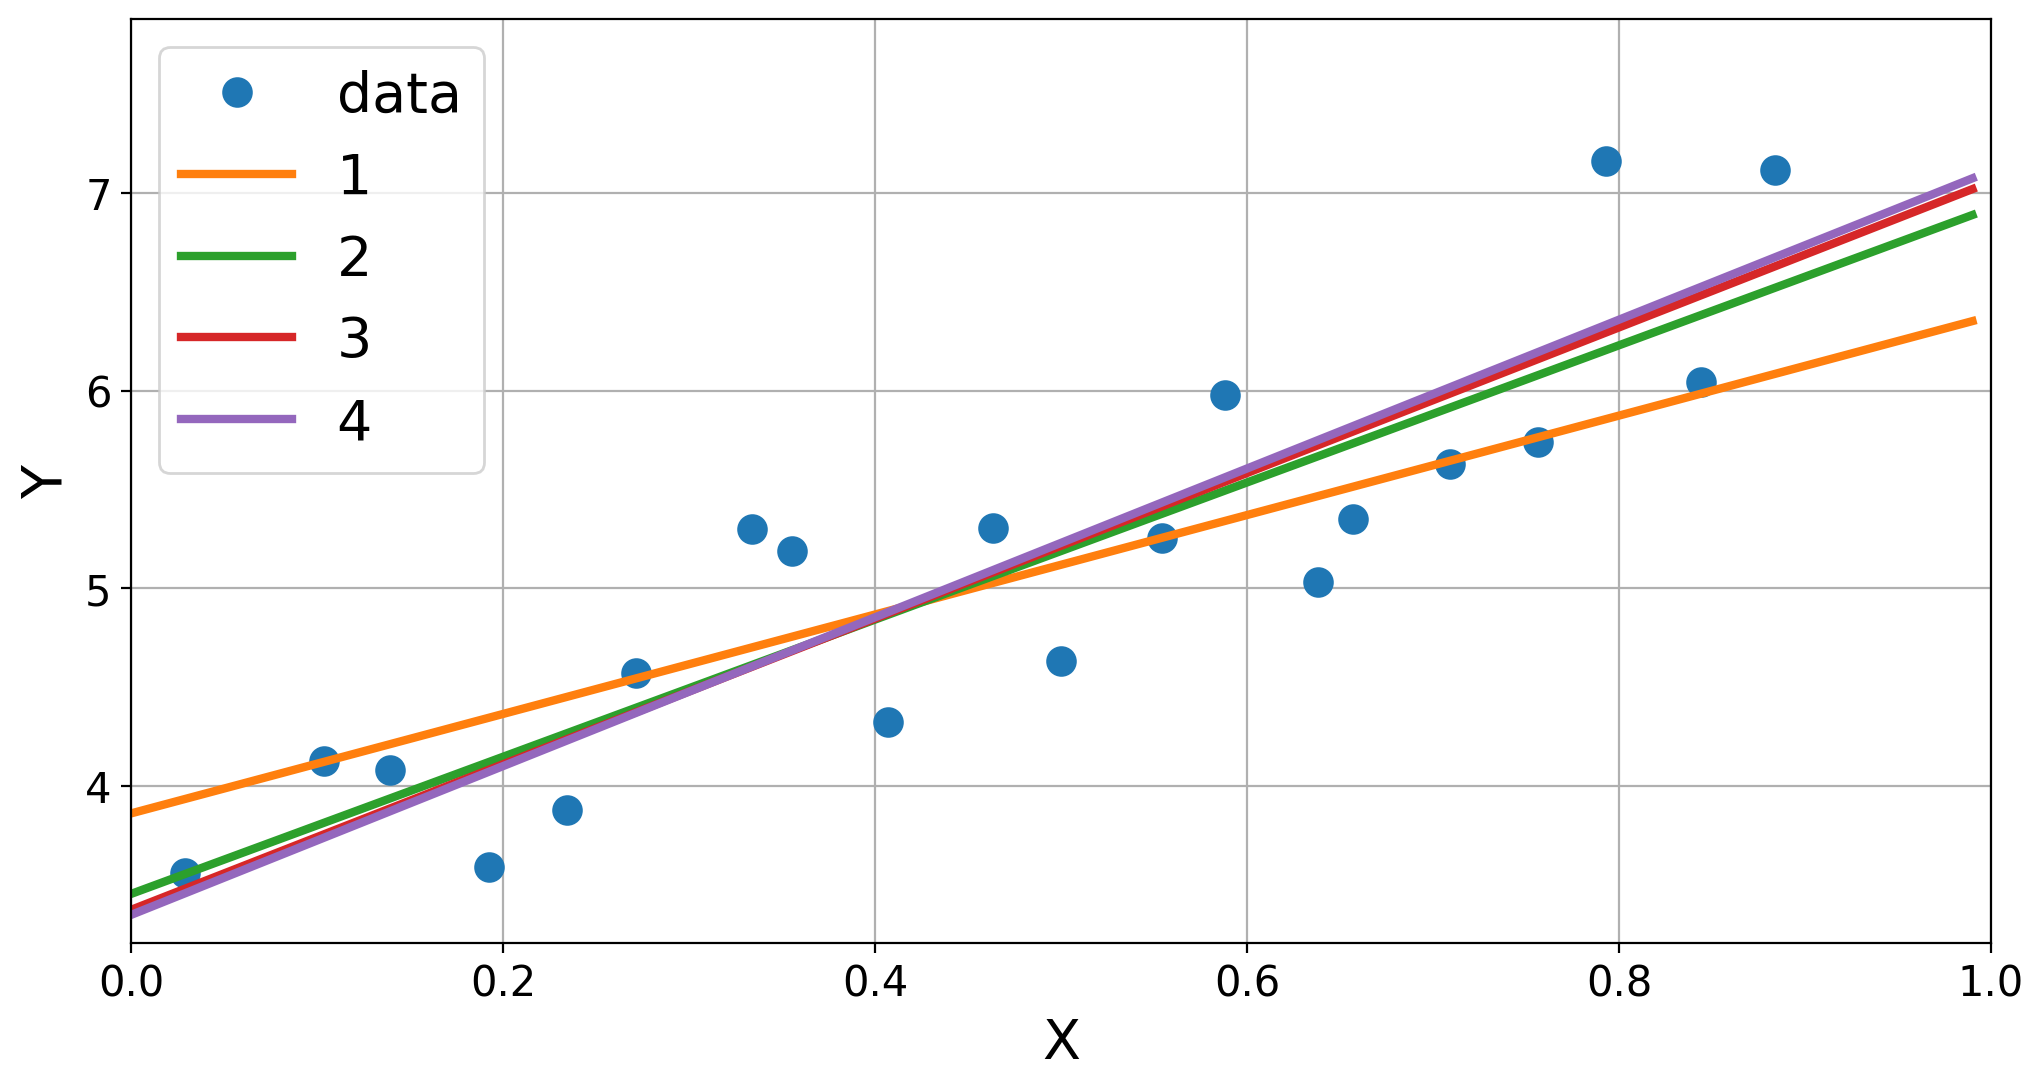

In [9]:
plot_res(data_x, data_y, weights=weights, is_list=True, labels=None, 
             is_data_list=False, data_labels=None, func=None)

## Learning Regression Model
- Datensatz mit Ausreißer

In [10]:
data_x = X2
data_y = Y2
alpha = 0.00001
# lorder = 2
dabs_error_max = 1e-7 
iter_max = 100_000
verbose = 1

weights: list = []

for lorder in range(1, 10):
    print("\n", "Lorder: ", lorder)
    weights.append(gradient_descent(data_x, data_y, alpha, lorder, dabs_error_max, 
                     iter_max, verbose))


 Lorder:  1
Regression not successful!
error: 24.914912391790374 delta error: 1.8812874539975155e-05 w0: 3.5878199999980316 w1: 3.4022971488528713  iter: 100000

 Lorder:  2
Regression successful :)
error: 11.378410217347023 delta error: 9.999668826310426e-08 w0: 4.236169976905543 w1: 3.3898051360973755  iter: 85775

 Lorder:  3
Regression successful :)
error: 9.32841706423862 delta error: 9.997967431729649e-08 w0: 6.30944274143976 w1: 1.3039689250502202  iter: 20562

 Lorder:  4
Regression successful :)
error: 8.27313401899354 delta error: 9.994898420018217e-08 w0: 7.4087438479967975 w1: 0.17583756917727483  iter: 4500

 Lorder:  5
Regression successful :)
error: 7.671967260689608 delta error: 9.959528313174815e-08 w0: 7.944762471221709 w1: -0.20685738811210488  iter: 892

 Lorder:  6
Regression not successful!
error: 2.771751388132482e+28 delta error: 2.771751388132482e+28 w0: -1.5684575114015337e+138 w1: -9.568274249583776e+137  iter: 4

 Lorder:  7
Regression not successful!
error

/var/folders/sh/1xhp8pld27df1s61x39nfsnm0000gn/T/ipykernel_3845/2753354538.py:14: RuntimeWarning: overflow encountered in power
  dloss = lorder*abs(error)**(lorder-1) * np.sign(error) # Ableitung der Verlustfunktion
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2788: RuntimeWarning: overflow encountered in power
  absx **= ord


/var/folders/sh/1xhp8pld27df1s61x39nfsnm0000gn/T/ipykernel_3845/3973217289.py:44: RuntimeWarning: invalid value encountered in scalar multiply
  ax.plot(xval, [iweights[1]*func[i](x)+iweights[0] for x in xval],


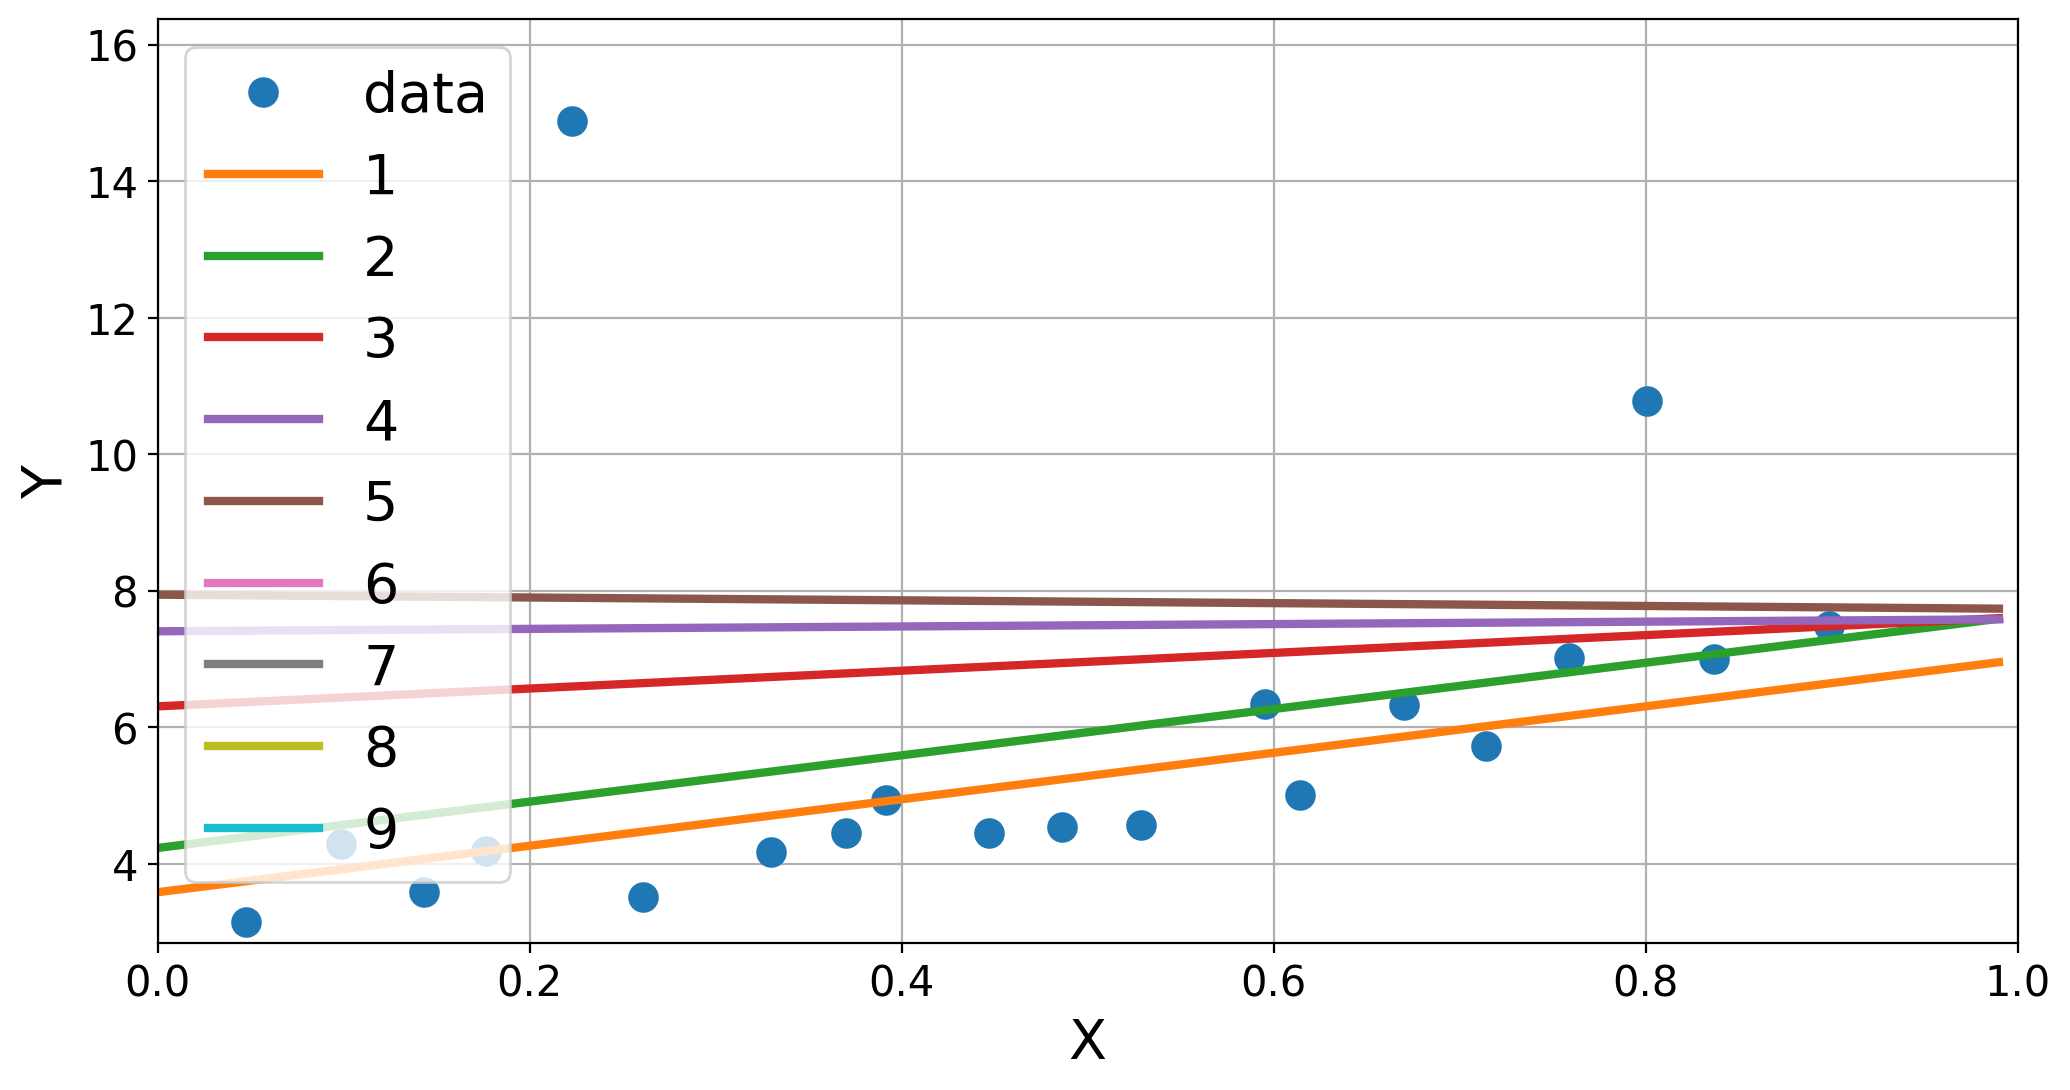

In [11]:
plot_res(data_x, data_y, weights=weights, is_list=True, labels=None, 
             is_data_list=False, data_labels=None, func=None)

### Warum funktioniert der Fit mit der L1-Norm so gut?
- Um das herauszufinden, betrachten wir mal den absoluten Fehler jedes einzelnen Punktes d.h. y - y_Vorhersage

Regression successful :)
error: 22.687772115246094 delta error: 5.0307097154700386e-08 w0: 2.9400000000000004 w1: 4.897554643828747  iter: 340


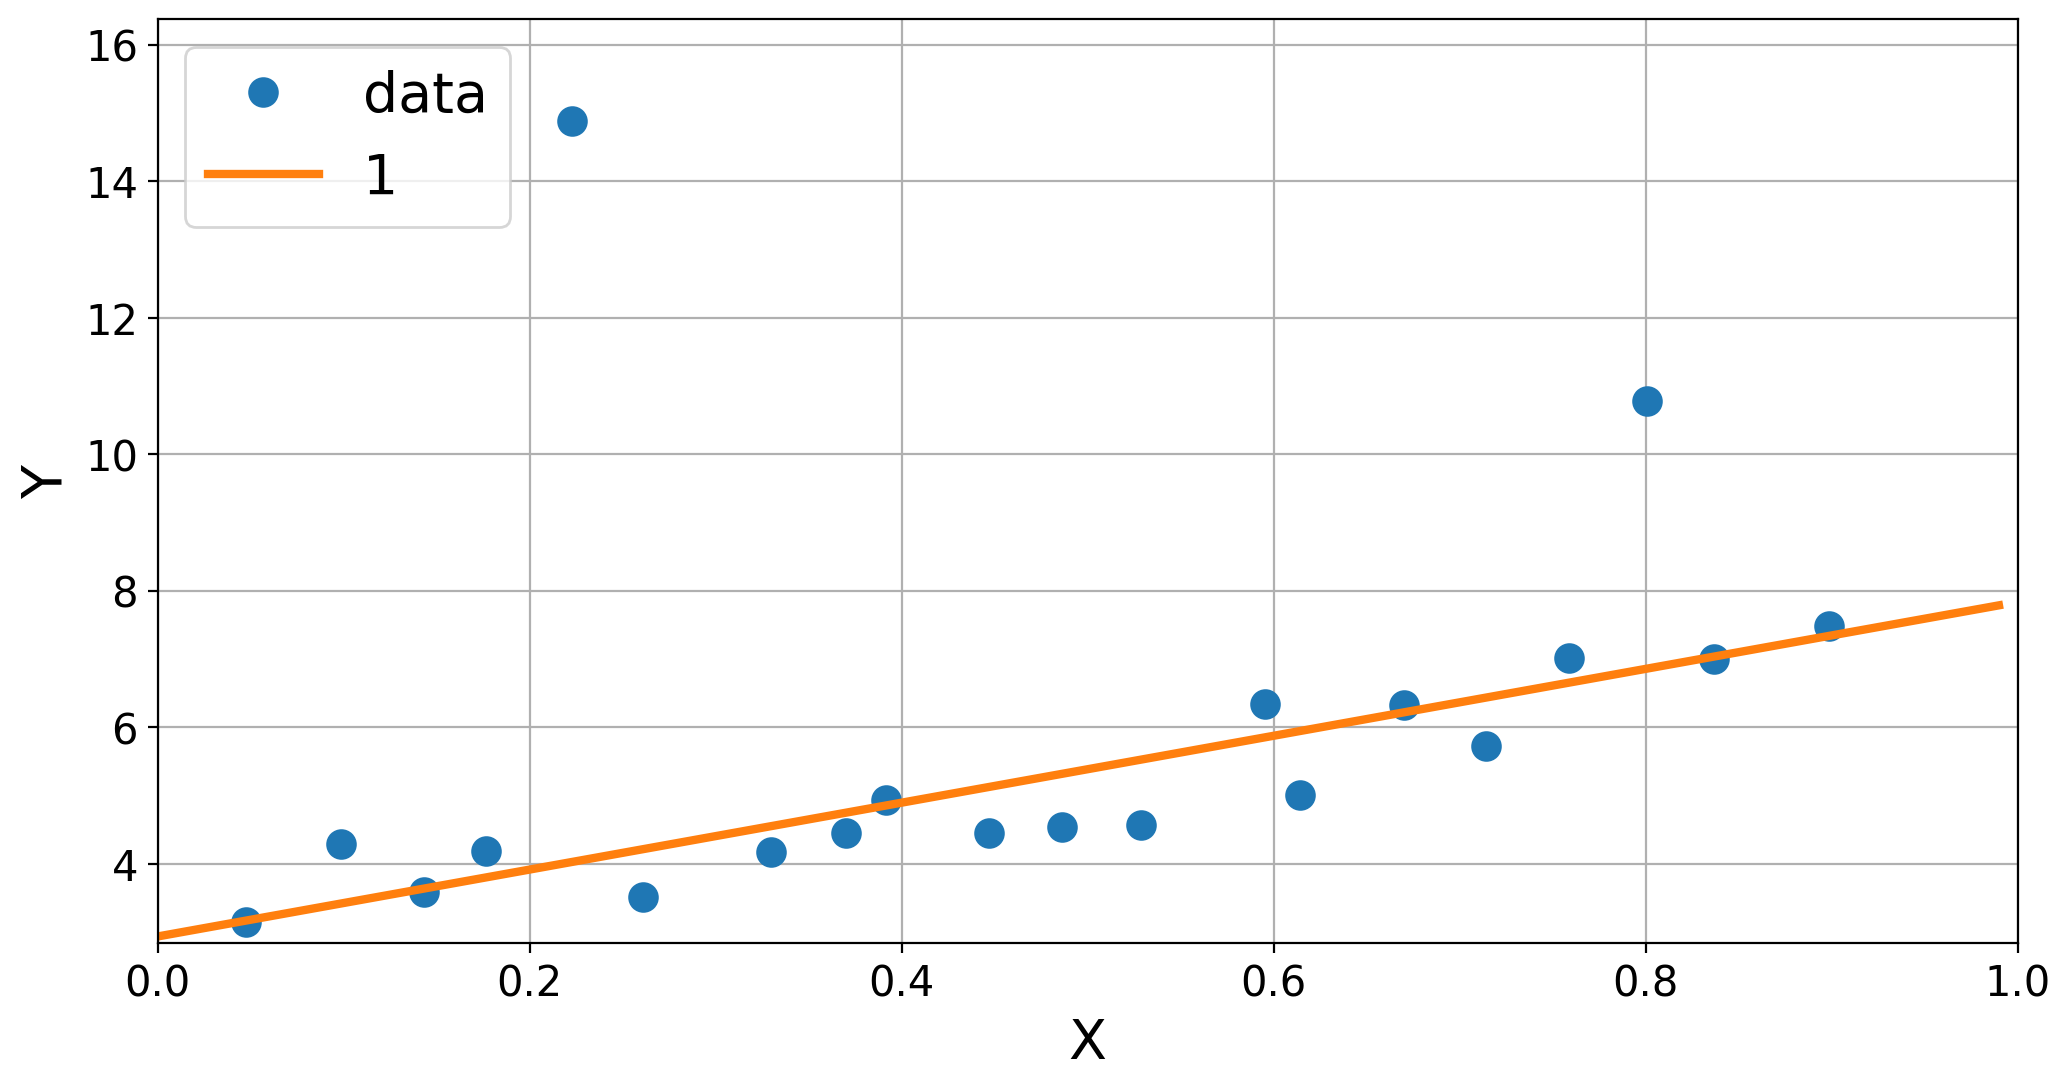

In [12]:
data_x = X2
data_y = Y2
alpha = 0.01
lorder = 1
dabs_error_max = 1e-7 
iter_max = 100_000
verbose = 1


weights = gradient_descent(data_x, data_y, alpha, lorder, dabs_error_max, 
                     iter_max, verbose)

plot_res(data_x=data_x, data_y=data_y, weights=weights, is_list=False)

In [13]:
# Berechnung der einzelnen absoluten Fehler von Y und unserer Hypothese (Fit-Funktion)
# Wir haben 11 negative und 9 positive Werte
w0, w1 = weights[0], weights[1]
errors = Y2 - (w0 + w1 * X2)
errors


array([-0.01888449,  0.87839208, -0.05335477,  0.38350319, 10.84701723,
       -0.70037436, -0.38158586, -0.29135032,  0.07726788, -0.67303203,
       -0.77864686, -0.95679855,  0.48489353, -0.93330614,  0.10018192,
       -0.71409912,  0.35619463,  3.92030113, -0.03338835,  0.14404823])

# **Trainieren der Daten mit Ausreißer anhand der Scikit-Bibliothek**

In [14]:
from sklearn import linear_model

In [15]:
reg = linear_model.LinearRegression()

In [16]:
data_x = X
data_y = Y
reg.fit(X = data_x, y = data_y)

ValueError: Expected 2D array, got 1D array instead:
array=[0.05981272 0.08622548 0.11969663 0.17465882 0.22106539 0.2725412
 0.30328235 0.35199395 0.42285041 0.44446345 0.50623116 0.52166993
 0.58128784 0.64756427 0.67863254 0.72273814 0.77295751 0.80561535
 0.86182689 0.91369694].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
data_x = X2.reshape(-1, 1)
data_y = Y2

reg.fit(data_x, data_y)

LinearRegression()

#### Ermittlung von **w0**

In [18]:
reg.coef_

array([3.59229927])

#### Ermittlung von Steigung, also **w1**

In [19]:
reg.intercept_

np.float64(4.13578392183641)

In [20]:
reg.score(data_x, data_y)

0.11482951956595921

### Plotten des Modells, um zu schauen, ob dieser "gut" genug ist

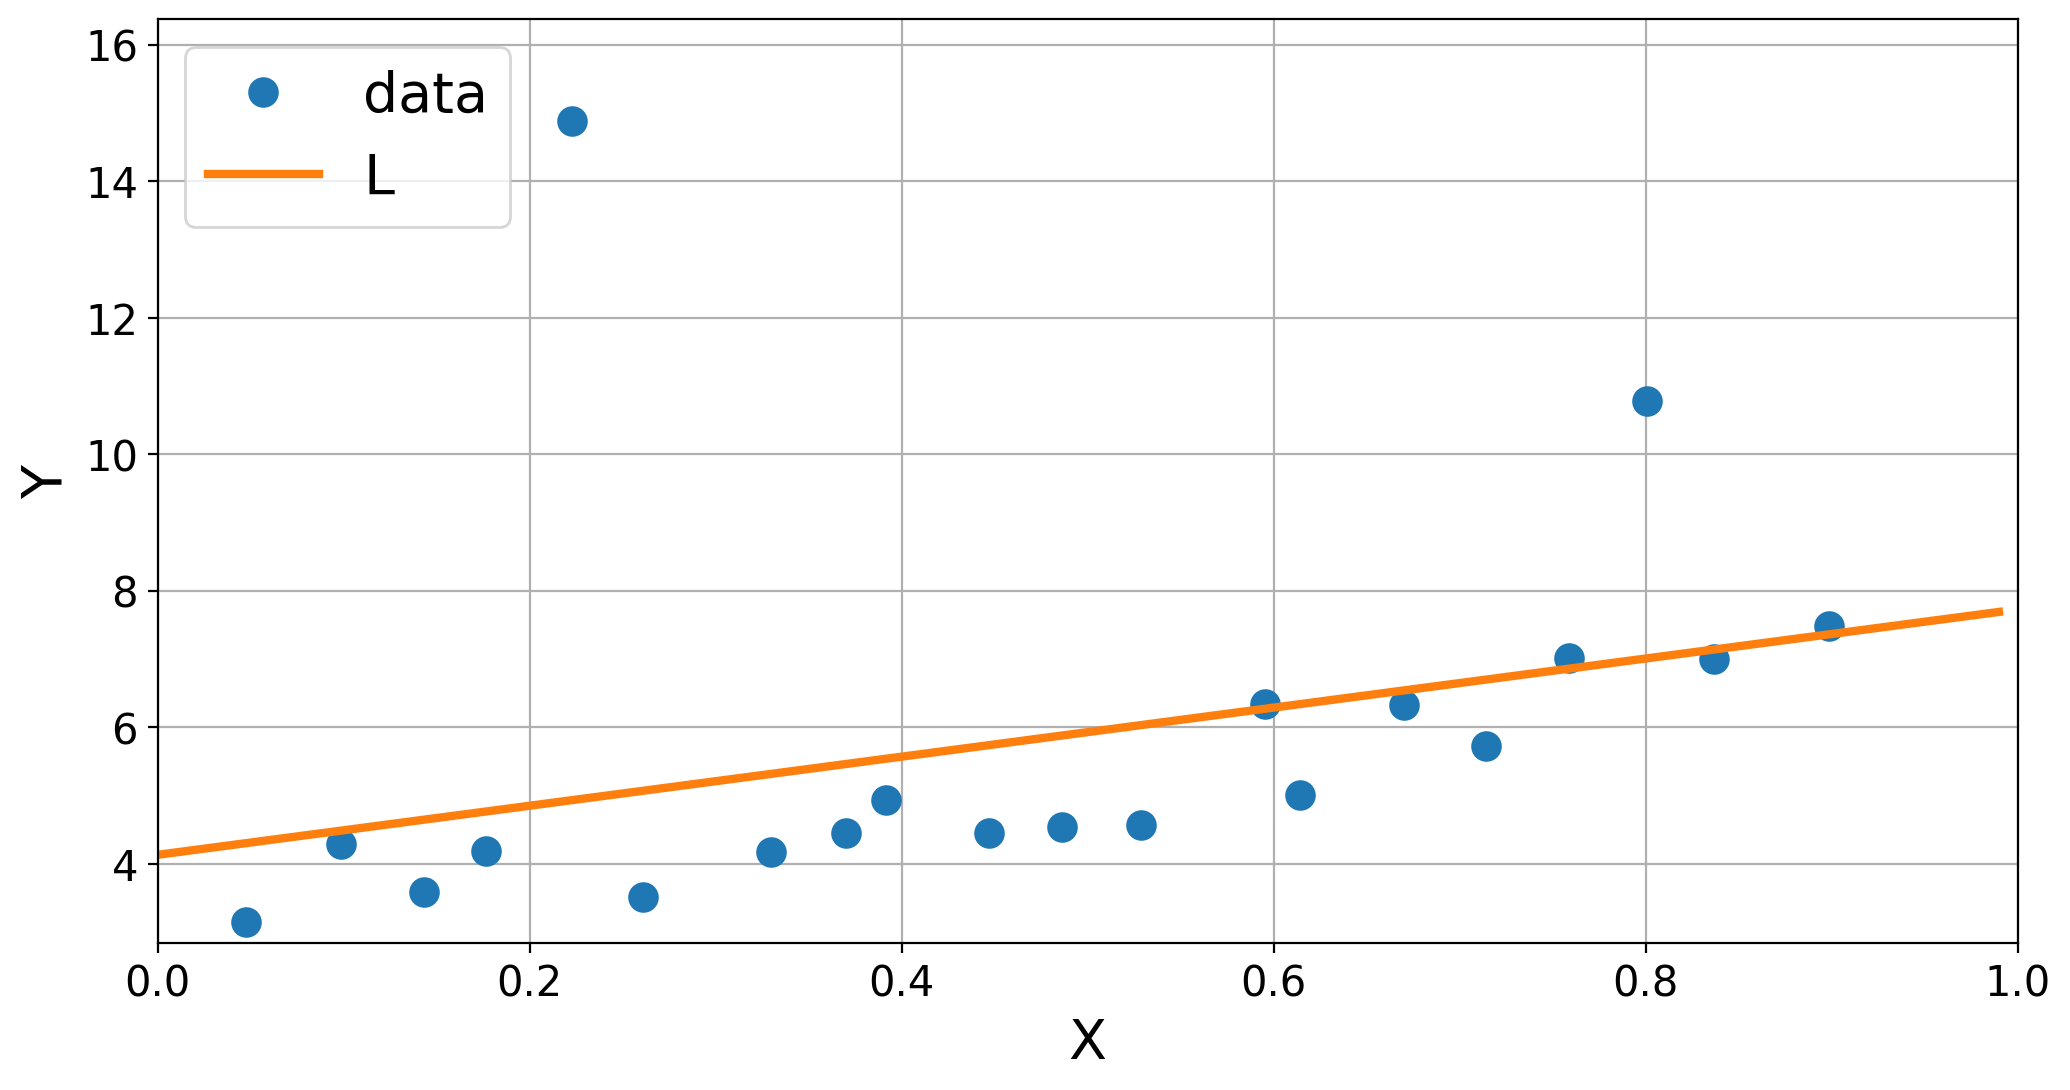

In [21]:
weights_learned = np.array([reg.intercept_, reg.coef_[0]])

plot_res(data_x=data_x, data_y=data_y, weights=weights_learned, is_list=False, labels="L2-Loss of Linear Regression")

## **Alternativer Weg, um die Gerade zu ermitteln ohne den obigen Fit durchzuführen**
- Hiermit berechnet man die diskreten Punkte im Koordinatensystem

In [22]:
xvals = np.arange(0, 1, 0.01)
yvals = reg.predict(xvals.reshape(-1, 1)) # Wir wollen immer 2D Array


TypeError: object of type 'NoneType' has no len()

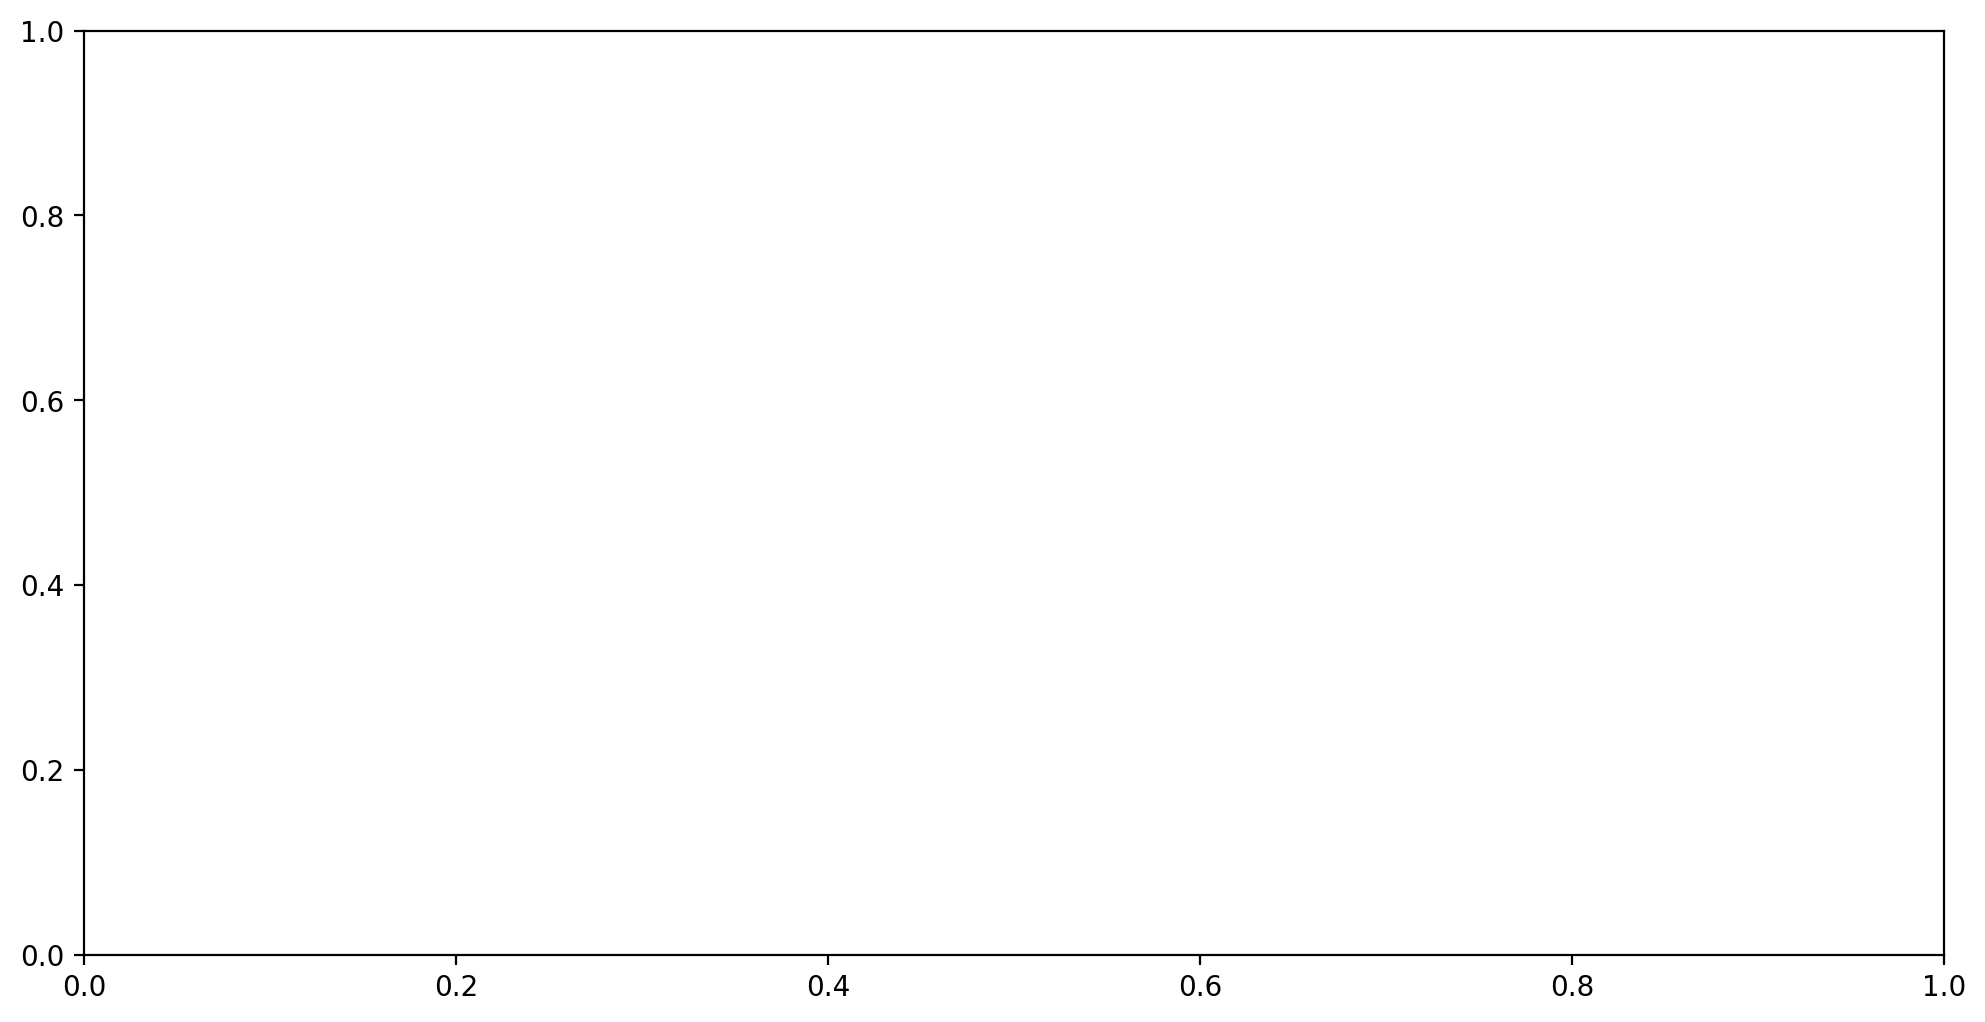

In [23]:

plot_res([data_x, xvals], [data_y, yvals], labels=["data", "prediction"], is_data_list=True)
